In [1]:
# %pip install seaborn altair

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(style='white')
import numpy as np
import pandas as pd
import altair as alt
import os

pd.set_option('display.max_columns', None)
# alt.renderers.enable('html')

# load data

In [3]:
df = pd.read_csv('matched_wc_2014_and_2019.csv', index_col=0)
print(df.shape)
df.head()

(86, 91)


,Name,GP_wc,MPG,PPG,PTS_wc,FG%,3P%,FT%,FGM_wc,FGA_wc,3PM,3PA,FTM_wc,FTA_wc,OFF,ORPG,DEF,DRPG,REB_wc,RPG,RP40M,AST_wc,APG,TO,TOPG,AP40M,AST/TO,wc_year,player_name,country_code_wc,DISPLAY_FIRST_LAST,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP_nba,GS,MIN,FGM_nba,FGA_nba,FG_PCT,FG3M,FG3A,FG3_PCT,FTM_nba,FTA_nba,FT_PCT,OREB,DREB,REB_nba,AST_nba,STL,BLK,TOV,PF,PTS_nba,PERSON_ID,FIRST_NAME,LAST_NAME,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,LAST_AFFILIATION,HEIGHT,WEIGHT,SEASON_EXP,JERSEY,POSITION,ROSTERSTATUS,GAMES_PLAYED_CURRENT_SEASON_FLAG,TEAM_ID_draft,TEAM_NAME,TEAM_ABBREVIATION_draft,TEAM_CODE,TEAM_CITY,PLAYERCODE,FROM_YEAR,TO_YEAR,DLEAGUE_FLAG,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,GREATEST_75_FLAG,country_code_nba
0,Andray Blatche (PHI)‎,5,33.8,21.2,106,44.2,27.3,80.0,7.6,17.2,1.2,4.4,4.8,6.0,7.0,1.4,62.0,12.4,69.0,13.8,16.3,4.0,0.8,25.0,5.0,0.9,0.2,2014,Andray Blatche,PHI,Andray Blatche,101154,2013-14,0,1610612751,BKN,27.0,73,7.0,1618.0,321,674,0.476,15.0,54.0,0.278,164,221,0.742,120.0,270.0,390.0,112,75.0,38.0,110.0,166,821,101154,Andray,Blatche,"Blatche, Andray",A. Blatche,andray-blatche,1986-08-22T00:00:00,South Kent HS (CT),USA,South Kent HS (CT)/USA,6-11,260.0,8,0.0,Center-Forward,Inactive,N,1610612764,Wizards,WAS,wizards,Washington,andray_blatche,2005,2013,Y,Y,Y,2005,2,49,NaN,PHI
1,Pau Gasol (ESP)‎,7,26.5,20.0,140,63.5,27.3,78.4,7.7,12.1,0.4,1.6,4.1,5.3,14.0,2.0,27.0,3.9,41.0,5.9,8.9,10.0,1.4,19.0,2.7,2.2,0.5,2014,Pau Gasol,ESP,Pau Gasol,2200,2013-14,0,1610612747,LAL,33.0,60,60.0,1884.0,425,885,0.480,4.0,14.0,0.286,187,254,0.736,124.0,456.0,580.0,201,27.0,92.0,141.0,124,1041,2200,Pau,Gasol,"Gasol, Pau",P. Gasol,pau-gasol,1980-07-06T00:00:00,,Spain,FC Barcelona/Germany,7-0,250.0,18,17.0,Center-Forward,Inactive,N,1610612749,Bucks,MIL,bucks,Milwaukee,pau_gasol,2001,2018,N,Y,Y,2001,1,3,NaN,ESP
2,Luís Scola (ARG)‎,6,32.4,19.5,117,48.2,60.0,66.7,6.8,14.2,0.5,0.8,5.3,8.0,13.0,2.2,38.0,6.3,51.0,8.5,10.5,14.0,2.3,11.0,1.8,2.9,1.3,2014,Luís Scola,ARG,Luis Scola,2449,2013-14,0,1610612754,IND,34.0,82,2.0,1399.0,263,560,0.470,1.0,7.0,0.143,99,136,0.728,86.0,305.0,391.0,81,26.0,16.0,108.0,164,626,2449,Luis,Scola,"Scola, Luis",L. Scola,luis-scola,1980-04-30T00:00:00,Tau Ceramica,Argentina,Tau Ceramica/Argentina,6-9,241.0,9,NaN,Forward,Inactive,N,0,NaN,NaN,NaN,NaN,luis_scola,2007,2016,N,Y,Y,2002,2,55,NaN,ARG
3,Gustavo Ayon (MEX)‎,5,32.2,17.6,88,61.0,0.0,51.6,7.2,11.8,0.0,0.0,3.2,6.2,18.0,3.6,20.0,4.0,38.0,7.6,9.5,7.0,1.4,12.0,2.4,1.8,0.6,2014,Gustavo Ayon,MEX,Gustavo Ayon,202970,2013-14,0,1610612737,ATL,29.0,26,14.0,429.0,52,102,0.510,0.0,0.0,0.000,8,20,0.400,42.0,83.0,125.0,28,25.0,10.0,29.0,47,112,202970,Gustavo,Ayon,"Ayon, Gustavo",G. Ayon,gustavo-ayon,1985-04-01T00:00:00,Baloncesto Fuenlabrada,Mexico,Baloncesto Fuenlabrada/Mexico,NaN,NaN,2,NaN,NaN,Inactive,N,0,NaN,NaN,NaN,NaN,gustavo_ayon,2011,2016,N,Y,Y,Undrafted,Undrafted,Undrafted,NaN,MEX
4,Francisco Alberto Garcia (DOM)‎,5,28.2,17.6,88,61.1,64.3,100.0,6.6,10.8,3.6,5.6,0.8,0.8,1.0,0.2,15.0,3.0,16.0,3.2,4.6,11.0,2.2,14.0,2.8,3.1,0.8,2014,Francisco Alberto Garcia,DOM,Francisco Garcia,101128,2013-14,0,1610612745,HOU,32.0,55,4.0,1083.0,118,294,0.401,69.0,193.0,0.358,10,19,0.526,21.0,101.0,122.0,63,27.0,33.0,30.0,120,315,101128,Francisco,Garcia,"Garcia, Francisco",F. Garcia,francisco-garcia,1981-12-31T00:00:00,Louisville,Dominican Republic,Louisville/Dominican Republic,6-7,215.0,9,NaN,Guard-Forward,Inactive,N,0,NaN,NaN,NaN,NaN,francisco_garcia,2005,2014,N,Y,Y,2005,1,23,NaN,DOM


In [4]:
def read_wc_data(year):
    fpath = os.path.join(f'{year}', 'points.csv')
    _df = pd.read_csv(fpath)
    _df.drop(columns='#', inplace=True)
    for col in ['FGM-FGA', '3PM-3PA', 'FTM-FTA']:
        _df[col.split('-')] = _df[col].str.split('-', expand=True).astype(float)
        _df.drop(columns=col, inplace=True)
    _df['wc_year'] = year
    _df[['player_name', 'country_code']] = _df.Name.str.split(' (', expand=True, regex=False)
    _df.country_code = _df.country_code.str[:3] 
    return _df

wc_df = pd.concat([read_wc_data(y) for y in [2014, 2019]]).reset_index(drop=True)
print(wc_df.shape)
wc_df.head()

(583, 17)


,Name,GP,MPG,PPG,PTS,FG%,3P%,FT%,FGM,FGA,3PM,3PA,FTM,FTA,wc_year,player_name,country_code
0,Jose Juan Barea (PUR)‎,5,29.4,22.0,110,44.9,52.6,87.5,6.2,13.8,4.0,7.6,5.6,6.4,2014,Jose Juan Barea,PUR
1,Andray Blatche (PHI)‎,5,33.8,21.2,106,44.2,27.3,80.0,7.6,17.2,1.2,4.4,4.8,6.0,2014,Andray Blatche,PHI
2,Bojan Bogdanovic (CRO)‎,6,33.5,21.2,127,50.0,36.1,74.4,6.8,13.7,2.2,6.0,5.3,7.2,2014,Bojan Bogdanovic,CRO
3,Pau Gasol (ESP)‎,7,26.5,20.0,140,63.5,27.3,78.4,7.7,12.1,0.4,1.6,4.1,5.3,2014,Pau Gasol,ESP
4,Luís Scola (ARG)‎,6,32.4,19.5,117,48.2,60.0,66.7,6.8,14.2,0.5,0.8,5.3,8.0,2014,Luís Scola,ARG


In [5]:
print(24 * 12, 32 * 12)
wc_df.wc_year.value_counts(dropna=False)

288 384


2019    335
2014    248
Name: wc_year, dtype: int64

# questions 
## Сколько нбашников играли на обоих ЧМ? Кто играл в разном статусе?

In [6]:
nba_2_wc_2 = (
    df
    .groupby('player_name')
    .agg({'wc_year': 'nunique',
          'country_code_wc': 'first'})
    # .to_frame()
    .query('wc_year > 1')
    .rename(columns={'country_code_wc': 'country_code'})
    .sort_values('country_code')
    .reset_index()
)
nba_2_wc_2

,player_name,wc_year,country_code
0,Aron Baynes,2,AUS
1,Matthew Dellavedova,2,AUS
2,Marc Gasol,2,ESP
3,Ricky Rubio,2,ESP
4,Evan Fournier,2,FRA
5,Nicolas Batum,2,FRA
6,Rudy Gobert,2,FRA
7,Giannis Antetokounmpo,2,GRE
8,Jonas Valanciunas,2,LTU
9,Mason Plumlee,2,USA


In [7]:
nba_1_wc_2 = (
    wc_df
    [wc_df.player_name.isin(df.player_name.unique())]
    .groupby('player_name')
    .agg({'wc_year': 'nunique',
          'country_code': 'first'})
    .query('wc_year > 1')
    .sort_values('country_code')
    .reset_index()
)
nba_1_wc_2 = nba_1_wc_2[~nba_1_wc_2.player_name.isin(nba_2_wc_2.player_name)]
nba_1_wc_2

,player_name,wc_year,country_code
0,Luís Scola,2,ARG
3,Joe Ingles,2,AUS
4,Anderson Varejao,2,BRA
5,Leandrinho Barbosa,2,BRA
8,Victor Claver,2,ESP
14,Andray Blatche,2,PHI
15,Hamady Ndiaye,2,SEN
16,Bogdan Bogdanovic,2,SRB
17,Miroslav Raduljica,2,SRB
18,Nemanja Bjelica,2,SRB


In [8]:
nba_1_wc_1 = (
    wc_df
    [wc_df.player_name.isin(df.player_name.unique())]
    .groupby('player_name')
    .agg({'wc_year': 'nunique',
          'country_code': 'first'})
    .query('wc_year == 1')
    .sort_values('country_code')
    .reset_index()
)
# nba_1_timers_1_wc = nba_1_timers_1_wc[~nba_1_timers_1_wc.player_name.isin(nba_2_timers.player_name)]
nba_1_wc_1

,player_name,wc_year,country_code
0,Pablo Prigioni,1,ARG
1,Mitch Creek,1,AUS
2,Andrew Bogut,1,AUS
3,Patty Mills,1,AUS
4,Maybner Rodney Hilario,1,BRA
5,Cristiano Felicio,1,BRA
6,Tiago Splitter,1,BRA
7,Bruno Caboclo,1,BRA
8,Cory Joseph,1,CAN
9,Khem Birch,1,CAN


In [9]:
nba_0_wc_2 = (
    wc_df
    .groupby('player_name')
    .agg({'wc_year': 'nunique',
          'country_code': 'first'})
    .query('wc_year > 1')
    .sort_values('country_code')
    .reset_index()
)
nba_0_wc_2 = nba_0_wc_2[(
    (~nba_0_wc_2.player_name.isin(nba_2_wc_2.player_name.to_list() + nba_1_wc_2.player_name.to_list() + nba_1_wc_1.player_name.to_list()))
)]
nba_0_wc_2

,player_name,wc_year,country_code
0,Yanick Moreira,2,ANG
1,Valdélicio Joaquim,2,ANG
2,Reggie Moore,2,ANG
3,Marcos Delia,2,ARG
5,Facundo Campazzo,2,ARG
9,Marquinhos Sousa,2,BRA
10,Marcelinho Huertas,2,BRA
12,Alex Garcia,2,BRA
14,Eloy Vargas,2,DOM
15,Victor Liz,2,DOM


In [10]:
nba_0_wc_1 = (
    wc_df
    .groupby('player_name')
    .agg({'wc_year': 'nunique',
          'country_code': 'first'})
    .query('wc_year == 1')
    .sort_values('country_code')
    .reset_index()
)
nba_0_wc_1 = nba_0_wc_1[(
    (~nba_0_wc_1.player_name.isin(nba_2_wc_2.player_name.to_list() + nba_1_wc_2.player_name.to_list() + nba_1_wc_1.player_name.to_list()))
)]
nba_0_wc_1

,player_name,wc_year,country_code
0,Carlos Morais,1,ANG
1,Armando Costa,1,ANG
2,Leonel Paulo,1,ANG
3,Milton Lourenco Rosa Barros,1,ANG
4,Jose Antonio,1,ANG
...,...,...,...
440,Dwight Lewis,1,VEN
441,Nestor Colmenares,1,VEN
442,Heissler Guillent,1,VEN
443,Jhornan Zamora,1,VEN


In [11]:
nba_0_wc_1[nba_0_wc_1.player_name.str.contains('mur')]

,player_name,wc_year,country_code


In [12]:
counts_dict = {
    '2 ЧМ, оба после НБА': nba_2_wc_2,
    '2 ЧМ, один после НБА': nba_1_wc_2,
    '1 ЧМ, после сезона в НБА': nba_1_wc_1,
    '2 ЧМ, без сезонов в НБА': nba_0_wc_2,
    '1 ЧМ, без сезонов в НБА': nba_0_wc_1,
}

In [13]:
# Create a list of dictionaries to represent the data in a tidy format
FS = 14
data_list = [{'Label': label, 'Length': len(df), 'order': i} 
             for i, (label, df) in enumerate(counts_dict.items())]

# Convert the data list to a pandas DataFrame
data = pd.DataFrame(data_list).sort_values('order', ascending=False)

# Create the bar chart using Altair
chart = alt.Chart(data).mark_bar().encode(
    x=alt.X('Label:N', title='', sort=data.Label.to_list(), axis=alt.Axis(labelAngle=0)),
    y=alt.Y('Length:Q', title='Сколько игроков')
)

text = chart.mark_text(
    align='center',
    baseline='bottom',
    dy=0,  # Adjust vertical position of text labels
    fontWeight='bold',
    fontSize=FS,
).encode(
    text='Length:Q'
)
name_data = []
for i, l in enumerate(['2 ЧМ, оба после НБА', 
                       '2 ЧМ, один после НБА']):
    _df = counts_dict[l]
    for i, (_name, _code) in enumerate(zip(_df.player_name, _df.country_code)):
        name_data.append({'Label': l, 'Name': _code + ' ' + _name, 'order': i, 'y': 229 - i * 20})
name_data = pd.DataFrame(name_data).sort_values('order', ascending=False)
# name_data['y'] = 200

names_chart = alt.Chart(name_data).mark_text(
    align='left',
    baseline='bottom',
    dy=5,  # Adjust vertical position of text labels
    dx=-60,
    # fontWeight='bold',
    fontSize=FS,
).encode(
    x=alt.X('Label:N', title='', sort=data.Label.to_list(), axis=alt.Axis(labelAngle=0)),
    y='y',
    text='Name'
)

# Combine the bar chart and text labels
final_chart = chart + text + names_chart

# Show the chart
final_chart.properties(
    title=alt.Title('Категории участников 2х последних ЧМ', fontSize=20),
    width=1200,
    height=600
).configure_axis(
    labelFontSize=FS,
    titleFontSize=FS
)

alt.LayerChart(...)

## Как корректно сравнивать статы?

In [14]:
df['PPG_nba'] = df.PTS_nba / df.GP_nba
df['RPG_nba'] = df.REB_nba / df.GP_nba
df['MPG_nba'] = df.MIN / df.GP_nba
df['PPG_per36_nba'] = df.PPG_nba / df.MPG_nba * 36
df['RPG_per36_nba'] = df.RPG_nba / df.MPG_nba * 36
df.query('MPG_nba < 10')
df.query('(20 > PPG_per36_nba > 15) and (wc_year == 2019)')


,Name,GP_wc,MPG,PPG,PTS_wc,FG%,3P%,FT%,FGM_wc,FGA_wc,3PM,3PA,FTM_wc,FTA_wc,OFF,ORPG,DEF,DRPG,REB_wc,RPG,RP40M,AST_wc,APG,TO,TOPG,AP40M,AST/TO,wc_year,player_name,country_code_wc,DISPLAY_FIRST_LAST,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP_nba,GS,MIN,FGM_nba,FGA_nba,FG_PCT,FG3M,FG3A,FG3_PCT,FTM_nba,FTA_nba,FT_PCT,OREB,DREB,REB_nba,AST_nba,STL,BLK,TOV,PF,PTS_nba,PERSON_ID,FIRST_NAME,LAST_NAME,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,LAST_AFFILIATION,HEIGHT,WEIGHT,SEASON_EXP,JERSEY,POSITION,ROSTERSTATUS,GAMES_PLAYED_CURRENT_SEASON_FLAG,TEAM_ID_draft,TEAM_NAME,TEAM_ABBREVIATION_draft,TEAM_CODE,TEAM_CITY,PLAYERCODE,FROM_YEAR,TO_YEAR,DLEAGUE_FLAG,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,GREATEST_75_FLAG,country_code_nba,PPG_nba,RPG_nba,MPG_nba,PPG_per36_nba,RPG_per36_nba
42,Bogdan Bogdanovic (SRB)‎,8,28.0,22.9,183,55.6,53.0,80.0,7.5,13.5,4.4,8.3,3.5,4.4,8.0,1.0,25.0,3.1,33.0,4.1,5.9,35.0,4.4,11.0,1.4,6.3,3.2,2019,Bogdan Bogdanovic,SRB,Bogdan Bogdanovic,203992,2018-19,0,1610612758,SAC,26.0,70,17.0,1947.0,361,863,0.418,134.0,372.0,0.360,134,162,0.827,40.0,203.0,243.0,267,72.0,15.0,117.0,142,990,203992,Bogdan,Bogdanovic,"Bogdanovic, Bogdan",B. Bogdanovic,bogdan-bogdanovic,1992-08-18T00:00:00,Fenerbahce,Serbia,Fenerbahce/Serbia,6-6,220.0,3,13.0,Guard,Active,Y,1610612737,Hawks,ATL,hawks,Atlanta,bogdan_bogdanovic,2017,2020,N,Y,Y,2014,1,27,NaN,SRB,14.142857,3.471429,27.814286,18.305085,4.493066
43,Patty Mills (AUS)‎,8,33.9,22.8,182,49.6,40.4,86.0,7.6,15.4,2.9,7.1,4.6,5.4,7.0,0.9,11.0,1.4,18.0,2.3,2.7,31.0,3.9,28.0,3.5,4.6,1.1,2019,Patty Mills,AUS,Patty Mills,201988,2018-19,0,1610612759,SAS,30.0,82,1.0,1908.0,282,663,0.425,159.0,404.0,0.394,88,103,0.854,24.0,158.0,182.0,245,49.0,10.0,93.0,129,811,201988,Patty,Mills,"Mills, Patty",P. Mills,patty-mills,1988-08-11T00:00:00,St.Mary's College of California,Australia,St.Mary's College of California/Australia,6-1,180.0,11,8.0,Guard,Active,Y,1610612759,Spurs,SAS,spurs,San Antonio,patty_mills,2009,2020,Y,Y,Y,2009,2,55,NaN,AUS,9.890244,2.219512,23.268293,15.301887,3.433962
45,Evan Fournier (FRA)‎,8,28.2,19.8,158,42.0,41.0,72.2,7.3,17.3,2.0,4.9,3.3,4.5,2.0,0.3,28.0,3.5,30.0,3.8,5.3,24.0,3.0,15.0,1.9,4.3,1.6,2019,Evan Fournier,FRA,Evan Fournier,203095,2018-19,0,1610612753,ORL,26.0,81,81.0,2553.0,468,1069,0.438,153.0,450.0,0.340,137,170,0.806,38.0,220.0,258.0,295,71.0,12.0,154.0,225,1226,203095,Evan,Fournier,"Fournier, Evan",E. Fournier,evan-fournier,1992-10-29T00:00:00,Poitiers Basket 86,France,Poitiers Basket 86/France,6-7,205.0,8,10.0,Guard-Forward,Active,Y,1610612753,Magic,ORL,magic,Orlando,evan_fournier,2012,2020,N,Y,Y,2012,1,20,NaN,FRA,15.135802,3.185185,31.518519,17.287897,3.638073
47,Ricky Rubio (ESP)‎,8,26.3,16.4,131,43.6,38.7,84.1,5.1,11.8,1.5,3.9,4.6,5.5,7.0,0.9,30.0,3.8,37.0,4.6,7.0,48.0,6.0,28.0,3.5,9.1,1.7,2019,Ricky Rubio,ESP,Ricky Rubio,201937,2018-19,0,1610612762,UTA,28.0,68,67.0,1899.0,295,730,0.404,79.0,254.0,0.311,195,228,0.855,33.0,210.0,243.0,416,91.0,10.0,180.0,180,864,201937,Ricky,Rubio,"Rubio, Ricky",R. Rubio,ricky-rubio,1990-10-21T00:00:00,FC Barcelona,Spain,FC Barcelona/Spain,6-3,190.0,9,11.0,Guard,Active,Y,1610612750,Timberwolves,MIN,timberwolves,Minnesota,ricky_rubio,2011,2020,N,Y,Y,2009,1,5,NaN,ESP,12.705882,3.573529,27.926471,16.379147,4.606635
51,Marco Belinelli (ITA)‎,5,29.0,15.0,75,40.0,33.3,72.0,4.8,12.0,1.8,5.4,3.6,5.0,3.0,0.6,17.0,3.4,20.0,4.0,5.5,16.0,3.2,8.0,1.6,4.4,2.0,2019,Marco Belinelli,ITA,Marco Belinelli,201158,2018-19,0,1610612759,SAS,33.0,79,1.0,1815.0,285,690,0.413,147.0,395.0,0.372,112,124,0.903,16.0,182.0,198.0,132,35.0,8.0,72.0,121,829,201158,Marco,Belinelli,"Belinelli, Marco",M. Belinelli,marco-belinelli,1986-03-25T00:00:00,Fortitudo Bologna,Italy,Fortitudo Bologna/Italy,6-5,220.0,13,18.0,Guard,Inactive,N,1610612759,Spurs,SAS,spurs,San Antonio,marco_belinelli,2007,2019,N,Y,Y,2007,1,18,NaN,ITA,10.493671,2.506329,22.974684,16.442975,3.927273
56,Marc Gasol (ESP)‎,8,28.5

In [15]:
for col in ['PTS_nba', 'REB_nba', 'AST_nba', 'MIN']:
    df[f'{col}_adj'] = df[col] / df.GP_nba * (40 / 48)
df.head()

,Name,GP_wc,MPG,PPG,PTS_wc,FG%,3P%,FT%,FGM_wc,FGA_wc,3PM,3PA,FTM_wc,FTA_wc,OFF,ORPG,DEF,DRPG,REB_wc,RPG,RP40M,AST_wc,APG,TO,TOPG,AP40M,AST/TO,wc_year,player_name,country_code_wc,DISPLAY_FIRST_LAST,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP_nba,GS,MIN,FGM_nba,FGA_nba,FG_PCT,FG3M,FG3A,FG3_PCT,FTM_nba,FTA_nba,FT_PCT,OREB,DREB,REB_nba,AST_nba,STL,BLK,TOV,PF,PTS_nba,PERSON_ID,FIRST_NAME,LAST_NAME,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,LAST_AFFILIATION,HEIGHT,WEIGHT,SEASON_EXP,JERSEY,POSITION,ROSTERSTATUS,GAMES_PLAYED_CURRENT_SEASON_FLAG,TEAM_ID_draft,TEAM_NAME,TEAM_ABBREVIATION_draft,TEAM_CODE,TEAM_CITY,PLAYERCODE,FROM_YEAR,TO_YEAR,DLEAGUE_FLAG,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,GREATEST_75_FLAG,country_code_nba,PPG_nba,RPG_nba,MPG_nba,PPG_per36_nba,RPG_per36_nba,PTS_nba_adj,REB_nba_adj,AST_nba_adj,MIN_adj
0,Andray Blatche (PHI)‎,5,33.8,21.2,106,44.2,27.3,80.0,7.6,17.2,1.2,4.4,4.8,6.0,7.0,1.4,62.0,12.4,69.0,13.8,16.3,4.0,0.8,25.0,5.0,0.9,0.2,2014,Andray Blatche,PHI,Andray Blatche,101154,2013-14,0,1610612751,BKN,27.0,73,7.0,1618.0,321,674,0.476,15.0,54.0,0.278,164,221,0.742,120.0,270.0,390.0,112,75.0,38.0,110.0,166,821,101154,Andray,Blatche,"Blatche, Andray",A. Blatche,andray-blatche,1986-08-22T00:00:00,South Kent HS (CT),USA,South Kent HS (CT)/USA,6-11,260.0,8,0.0,Center-Forward,Inactive,N,1610612764,Wizards,WAS,wizards,Washington,andray_blatche,2005,2013,Y,Y,Y,2005,2,49,NaN,PHI,11.246575,5.342466,22.164384,18.266996,8.677379,9.372146,4.452055,1.278539,18.470320
1,Pau Gasol (ESP)‎,7,26.5,20.0,140,63.5,27.3,78.4,7.7,12.1,0.4,1.6,4.1,5.3,14.0,2.0,27.0,3.9,41.0,5.9,8.9,10.0,1.4,19.0,2.7,2.2,0.5,2014,Pau Gasol,ESP,Pau Gasol,2200,2013-14,0,1610612747,LAL,33.0,60,60.0,1884.0,425,885,0.480,4.0,14.0,0.286,187,254,0.736,124.0,456.0,580.0,201,27.0,92.0,141.0,124,1041,2200,Pau,Gasol,"Gasol, Pau",P. Gasol,pau-gasol,1980-07-06T00:00:00,,Spain,FC Barcelona/Germany,7-0,250.0,18,17.0,Center-Forward,Inactive,N,1610612749,Bucks,MIL,bucks,Milwaukee,pau_gasol,2001,2018,N,Y,Y,2001,1,3,NaN,ESP,17.350000,9.666667,31.400000,19.891720,11.082803,14.458333,8.055556,2.791667,26.166667
2,Luís Scola (ARG)‎,6,32.4,19.5,117,48.2,60.0,66.7,6.8,14.2,0.5,0.8,5.3,8.0,13.0,2.2,38.0,6.3,51.0,8.5,10.5,14.0,2.3,11.0,1.8,2.9,1.3,2014,Luís Scola,ARG,Luis Scola,2449,2013-14,0,1610612754,IND,34.0,82,2.0,1399.0,263,560,0.470,1.0,7.0,0.143,99,136,0.728,86.0,305.0,391.0,81,26.0,16.0,108.0,164,626,2449,Luis,Scola,"Scola, Luis",L. Scola,luis-scola,1980-04-30T00:00:00,Tau Ceramica,Argentina,Tau Ceramica/Argentina,6-9,241.0,9,NaN,Forward,Inactive,N,0,NaN,NaN,NaN,NaN,luis_scola,2007,2016,N,Y,Y,2002,2,55,NaN,ARG,7.634146,4.768293,17.060976,16.108649,10.061472,6.361789,3.973577,0.823171,14.217480
3,Gustavo Ayon (MEX)‎,5,32.2,17.6,88,61.0,0.0,51.6,7.2,11.8,0.0,0.0,3.2,6.2,18.0,3.6,20.0,4.0,38.0,7.6,9.5,7.0,1.4,12.0,2.4,1.8,0.6,2014,Gustavo Ayon,MEX,Gustavo Ayon,202970,2013-14,0,1610612737,ATL,29.0,26,14.0,429.0,52,102,0.510,0.0,0.0,0.000,8,20,0.400,42.0,83.0,125.0,28,25.0,10.0,29.0,47,112,202970,Gustavo,Ayon,"Ayon, Gustavo",G. Ayon,gustavo-ayon,1985-04-01T00:00:00,Baloncesto Fuenlabrada,Mexico,Baloncesto Fuenlabrada/Mexico,NaN,NaN,2,NaN,NaN,Inactive,N,0,NaN,NaN,NaN,NaN,gustavo_ayon,2011,2016,N,Y,Y,Undrafted,Undrafted,Undrafted,NaN,MEX,4.307692,4.807692,16.500000,9.398601,10.489510,3.589744,4.006410,0.897436,13.750000
4,Francisco Alberto Garcia (DOM)‎,5,28.2,17.6,88,61.1,64.3,100.0,6.6,10.8,3.6,5.6,0.8,0.8,1.0,0.2,15.0,3.0,16.0,3.2,4.6,11.0,2.2,14.0,2.8,3.1,0.8,2014,Francisco Alberto Garcia,DOM,Francisco Garcia,101128,2013-14,0,1610612745,HOU,32.0,55,4.0,1083.0,118,294,0.401,69.0,193.0,0.358,10,19,0.526,21.0,101.0,122.0,63,27.0,33.0,30.0,120,315,101128,Francisco,Garcia,"Garcia, Francisco",F. Garcia,francisco-garcia,1981-12-31T00:00:00,Louisville,Dominican Republic,Louisville/Dominican Republic,6-7,215.0,9,NaN,Guard-Forward,Inactive,N,0,NaN,NaN,NaN,NaN,francisco_garcia,2005,2014,N,Y,Y,2005,1,23,

## как менялась результативность?

In [16]:
def plot_points(df, minutes_limit=40, font_size=14):
    df = df.copy()
    df['wc_year_cat'] = pd.Categorical(df.wc_year)
    
    scatter_plot1 = alt.Chart(df).mark_circle().encode(
        y='PTS_nba_adj',
        x=alt.X('MIN_adj').scale(domain=(0, 2*minutes_limit)),
        color='wc_year_cat',
    )

    df_labels_1 = df.sort_values('PTS_nba_adj').iloc[::2]
    labels1 = alt.Chart(df_labels_1).mark_text(align='right', angle=0, dx=-5, fontSize=font_size).encode(
        y='PTS_nba_adj',
        x='MIN_adj',
        color='wc_year_cat',
        text='DISPLAY_FI_LAST',
    )
    
    df['MPG_adj'] = df['MPG'] + minutes_limit
    
    scatter_plot2 = alt.Chart(df).mark_circle().encode(
        y='PPG',
        x=alt.X('MPG_adj', axis=alt.Axis(labelExpr=f'datum.value > {minutes_limit} ? datum.value - {minutes_limit} : datum.value')),
        color='wc_year_cat',
    )

    df_labels_2 = df.drop(df_labels_1.index, axis=0)
    labels2 = alt.Chart(df_labels_2).mark_text(align='left', angle=0, dx=5, fontSize=font_size).encode(
        y='PPG',
        x='MPG_adj',
        color='wc_year_cat',
        text='DISPLAY_FI_LAST',
    )
    
    lines = alt.Chart(df).mark_rule(color='gray', strokeDash=[5, 5]).encode(
        y='PTS_nba_adj',
        x='MIN_adj',
        y2='PPG',
        x2='MPG_adj',
        color=alt.Color('wc_year_cat', title='Год'),
    )
    
    separator = alt.Chart(pd.DataFrame({'x': [minutes_limit]})).mark_rule(color='black', strokeDash=[2, 2]).encode(
        x='x'
    )
    
    final_plot = (scatter_plot1 + labels1 + scatter_plot2 + labels2 + lines + separator)
    
    final_plot.layer[0].encoding.y.title = 'Очки за игру'
    final_plot.layer[0].encoding.x.title = 'Минут за игру в НБА*      \t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t           Минут за игру на ЧМ'
    
    return final_plot.properties(
        title=alt.Title('Результатвность в НБА и на ЧМ', fontSize=font_size*5//4),
        width=1000,
        height=800
    ).configure_axis(
    labelFontSize=font_size,
    titleFontSize=font_size
    ).configure_legend(
    titleFontSize=font_size,
    labelFontSize=font_size
    ) 

plot_points(df.query('(country_code_wc == "USA") and (wc_year != 20014)'), font_size=14)

alt.LayerChart(...)

,count,mean,std,min,25%,50%,75%,max
ppg_coef,86.0,1.058151,0.910137,0.030637,0.471423,0.843109,1.406632,4.979675


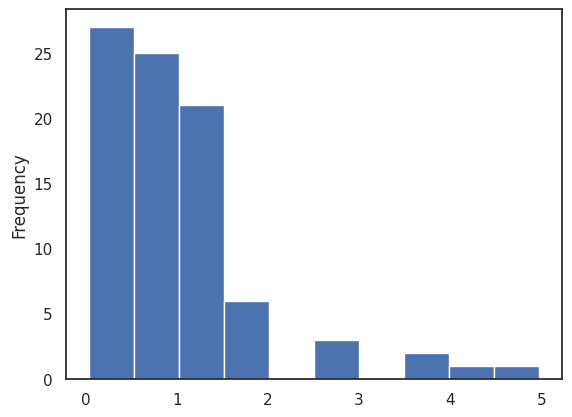

In [17]:
# plot_points(df.query('(country_code_wc == "USA") and (wc_year == 2019)'))
df['ppg_coef'] = df.PTS_nba_adj / df.PPG
df.ppg_coef.plot.hist();
df[['ppg_coef']].describe().T

In [18]:
df[df.player_name.str.lower().str.contains('antet')]

,Name,GP_wc,MPG,PPG,PTS_wc,FG%,3P%,FT%,FGM_wc,FGA_wc,3PM,3PA,FTM_wc,FTA_wc,OFF,ORPG,DEF,DRPG,REB_wc,RPG,RP40M,AST_wc,APG,TO,TOPG,AP40M,AST/TO,wc_year,player_name,country_code_wc,DISPLAY_FIRST_LAST,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP_nba,GS,MIN,FGM_nba,FGA_nba,FG_PCT,FG3M,FG3A,FG3_PCT,FTM_nba,FTA_nba,FT_PCT,OREB,DREB,REB_nba,AST_nba,STL,BLK,TOV,PF,PTS_nba,PERSON_ID,FIRST_NAME,LAST_NAME,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,LAST_AFFILIATION,HEIGHT,WEIGHT,SEASON_EXP,JERSEY,POSITION,ROSTERSTATUS,GAMES_PLAYED_CURRENT_SEASON_FLAG,TEAM_ID_draft,TEAM_NAME,TEAM_ABBREVIATION_draft,TEAM_CODE,TEAM_CITY,PLAYERCODE,FROM_YEAR,TO_YEAR,DLEAGUE_FLAG,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,GREATEST_75_FLAG,country_code_nba,PPG_nba,RPG_nba,MPG_nba,PPG_per36_nba,RPG_per36_nba,PTS_nba_adj,REB_nba_adj,AST_nba_adj,MIN_adj,ppg_coef
32,Giannis Antetokounmpo (GRE)‎,6,15.7,6.3,38,45.8,11.1,78.9,1.8,4.0,0.2,1.5,2.5,3.2,3.0,0.5,23.0,3.8,26.0,4.3,11.1,2.0,0.3,8.0,1.3,0.9,0.3,2014,Giannis Antetokounmpo,GRE,Giannis Antetokounmpo,203507,2013-14,0,1610612749,MIL,19.0,77,23.0,1897.0,173,418,0.414,41.0,118.0,0.347,138,202,0.683,78.0,261.0,339.0,150,60.0,61.0,122.0,173,525,203507,Giannis,Antetokounmpo,"Antetokounmpo, Giannis",G. Antetokounmpo,giannis-antetokounmpo,1994-12-06T00:00:00,Filathlitikos,Greece,Filathlitikos/Greece,6-11,242.0,7,34.0,Forward,Active,Y,1610612749,Bucks,MIL,bucks,Milwaukee,giannis_antetokounmpo,2013,2020,N,Y,Y,2013,1,15,NaN,GRE,6.818182,4.402597,24.636364,9.963100,6.433316,5.681818,3.668831,1.623377,20.530303,0.901876
53,Giannis Antetokounmpo (GRE)‎,5,24.9,14.8,74,52.2,22.2,70.6,4.8,9.2,0.4,1.8,4.8,6.8,5.0,1.0,39.0,7.8,44.0,8.8,14.2,12.0,2.4,13.0,2.6,3.9,0.9,2019,Giannis Antetokounmpo,GRE,Giannis Antetokounmpo,203507,2018-19,0,1610612749,MIL,24.0,72,72.0,2358.0,721,1247,0.578,52.0,203.0,0.256,500,686,0.729,159.0,739.0,898.0,424,92.0,110.0,268.0,232,1994,203507,Giannis,Antetokounmpo,"Antetokounmpo, Giannis",G. Antetokounmpo,giannis-antetokounmpo,1994-12-06T00:00:00,Filathlitikos,Greece,Filathlitikos/Greece,6-11,242.0,7,34.0,Forward,Active,Y,1610612749,Bucks,MIL,bucks,Milwaukee,giannis_antetokounmpo,2013,2020,N,Y,Y,2013,1,15,NaN,GRE,27.694444,12.472222,32.750000,30.442748,13.709924,23.078704,10.393519,4.907407,27.291667,1.559372


In [19]:
plot_points(df.query('(country_code_wc != "USA") and (ppg_coef >= 1)'))

alt.LayerChart(...)

In [20]:
plot_points(df.query('(country_code_wc != "USA") and (0.5 < ppg_coef < 1)'))

alt.LayerChart(...)

In [21]:
plot_points(df.query('(country_code_wc != "USA") and (0.5 >= ppg_coef)'))

alt.LayerChart(...)

## как менялись подборы ?

In [22]:
def plot_rebs(df, minutes_limit=40, font_size=16):
    df = df.copy()
    df['wc_year_cat'] = pd.Categorical(df.wc_year)
    
    scatter_plot1 = alt.Chart(df).mark_circle().encode(
        y='REB_nba_adj',
        x=alt.X('MIN_adj').scale(domain=(0, 2*minutes_limit)),
        color='wc_year_cat',
    )

    df_labels_1 = df.sort_values('REB_nba_adj').iloc[::2]
    labels1 = alt.Chart(df_labels_1).mark_text(align='right', angle=0, fontSize=font_size).encode(
        y='REB_nba_adj',
        x='MIN_adj',
        color='wc_year_cat',
        text='DISPLAY_FI_LAST',
    )
    
    df['MPG_adj'] = df['MPG'] + minutes_limit
    
    scatter_plot2 = alt.Chart(df).mark_circle().encode(
        y='RPG',
        x=alt.X('MPG_adj', axis=alt.Axis(labelExpr=f'datum.value > {minutes_limit} ? datum.value - {minutes_limit} : datum.value')),
        color='wc_year_cat',
    )

    df_labels_2 = df.drop(df_labels_1.index, axis=0)
    labels2 = alt.Chart(df_labels_2).mark_text(align='left', angle=0, fontSize=font_size).encode(
        y='RPG',
        x='MPG_adj',
        color='wc_year_cat',
        text='DISPLAY_FI_LAST',
    )
    
    lines = alt.Chart(df).mark_rule(color='gray', strokeDash=[5, 5]).encode(
        y='REB_nba_adj',
        x='MIN_adj',
        y2='RPG',
        x2='MPG_adj',
        color=alt.Color('wc_year_cat', title='Год'),
    )
    
    separator = alt.Chart(pd.DataFrame({'x': [minutes_limit]})).mark_rule(color='black', strokeDash=[2, 2]).encode(
        x='x'
    )
    
    final_plot = (scatter_plot1 + labels1 + scatter_plot2 + labels2 + lines + separator)
    
    final_plot.layer[0].encoding.y.title = 'Подборы за игру'
    final_plot.layer[0].encoding.x.title = 'Минут за игру в НБА*      \t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t           Минут за игру на ЧМ'
    
    return final_plot .properties(
        title=alt.Title('Количество подборов в НБА и на ЧМ', fontSize=font_size*5//4),
        width=1000,
        height=800
    ).configure_axis(
    labelFontSize=font_size,
    titleFontSize=font_size
    ).configure_legend(
    titleFontSize=font_size,
    labelFontSize=font_size
    )

plot_rebs(df.query('(country_code_wc == "USA")'), font_size=14)

alt.LayerChart(...)

,Name,GP_wc,MPG,PPG,PTS_wc,FG%,3P%,FT%,FGM_wc,FGA_wc,3PM,3PA,FTM_wc,FTA_wc,OFF,ORPG,DEF,DRPG,REB_wc,RPG,RP40M,AST_wc,APG,TO,TOPG,AP40M,AST/TO,wc_year,player_name,country_code_wc,DISPLAY_FIRST_LAST,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP_nba,GS,MIN,FGM_nba,FGA_nba,FG_PCT,FG3M,FG3A,FG3_PCT,FTM_nba,FTA_nba,FT_PCT,OREB,DREB,REB_nba,AST_nba,STL,BLK,TOV,PF,PTS_nba,PERSON_ID,FIRST_NAME,LAST_NAME,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,LAST_AFFILIATION,HEIGHT,WEIGHT,SEASON_EXP,JERSEY,POSITION,ROSTERSTATUS,GAMES_PLAYED_CURRENT_SEASON_FLAG,TEAM_ID_draft,TEAM_NAME,TEAM_ABBREVIATION_draft,TEAM_CODE,TEAM_CITY,PLAYERCODE,FROM_YEAR,TO_YEAR,DLEAGUE_FLAG,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,GREATEST_75_FLAG,country_code_nba,PPG_nba,RPG_nba,MPG_nba,PPG_per36_nba,RPG_per36_nba,PTS_nba_adj,REB_nba_adj,AST_nba_adj,MIN_adj,ppg_coef,rpg_coef


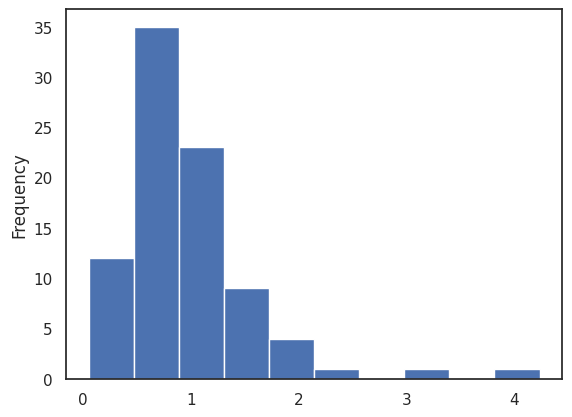

In [23]:
# plot_points(df.query('(country_code_wc == "USA") and (wc_year == 2019)'))
df['rpg_coef'] = (df.REB_nba_adj / (df.RPG + 0.1))#.fillna(0)
df.rpg_coef.plot.hist();
df[['rpg_coef']].describe().T
df.query('rpg_coef > 10')

In [24]:
df[df.player_name.str.lower().str.contains('antet')]

,Name,GP_wc,MPG,PPG,PTS_wc,FG%,3P%,FT%,FGM_wc,FGA_wc,3PM,3PA,FTM_wc,FTA_wc,OFF,ORPG,DEF,DRPG,REB_wc,RPG,RP40M,AST_wc,APG,TO,TOPG,AP40M,AST/TO,wc_year,player_name,country_code_wc,DISPLAY_FIRST_LAST,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP_nba,GS,MIN,FGM_nba,FGA_nba,FG_PCT,FG3M,FG3A,FG3_PCT,FTM_nba,FTA_nba,FT_PCT,OREB,DREB,REB_nba,AST_nba,STL,BLK,TOV,PF,PTS_nba,PERSON_ID,FIRST_NAME,LAST_NAME,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,LAST_AFFILIATION,HEIGHT,WEIGHT,SEASON_EXP,JERSEY,POSITION,ROSTERSTATUS,GAMES_PLAYED_CURRENT_SEASON_FLAG,TEAM_ID_draft,TEAM_NAME,TEAM_ABBREVIATION_draft,TEAM_CODE,TEAM_CITY,PLAYERCODE,FROM_YEAR,TO_YEAR,DLEAGUE_FLAG,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,GREATEST_75_FLAG,country_code_nba,PPG_nba,RPG_nba,MPG_nba,PPG_per36_nba,RPG_per36_nba,PTS_nba_adj,REB_nba_adj,AST_nba_adj,MIN_adj,ppg_coef,rpg_coef
32,Giannis Antetokounmpo (GRE)‎,6,15.7,6.3,38,45.8,11.1,78.9,1.8,4.0,0.2,1.5,2.5,3.2,3.0,0.5,23.0,3.8,26.0,4.3,11.1,2.0,0.3,8.0,1.3,0.9,0.3,2014,Giannis Antetokounmpo,GRE,Giannis Antetokounmpo,203507,2013-14,0,1610612749,MIL,19.0,77,23.0,1897.0,173,418,0.414,41.0,118.0,0.347,138,202,0.683,78.0,261.0,339.0,150,60.0,61.0,122.0,173,525,203507,Giannis,Antetokounmpo,"Antetokounmpo, Giannis",G. Antetokounmpo,giannis-antetokounmpo,1994-12-06T00:00:00,Filathlitikos,Greece,Filathlitikos/Greece,6-11,242.0,7,34.0,Forward,Active,Y,1610612749,Bucks,MIL,bucks,Milwaukee,giannis_antetokounmpo,2013,2020,N,Y,Y,2013,1,15,NaN,GRE,6.818182,4.402597,24.636364,9.963100,6.433316,5.681818,3.668831,1.623377,20.530303,0.901876,0.833825
53,Giannis Antetokounmpo (GRE)‎,5,24.9,14.8,74,52.2,22.2,70.6,4.8,9.2,0.4,1.8,4.8,6.8,5.0,1.0,39.0,7.8,44.0,8.8,14.2,12.0,2.4,13.0,2.6,3.9,0.9,2019,Giannis Antetokounmpo,GRE,Giannis Antetokounmpo,203507,2018-19,0,1610612749,MIL,24.0,72,72.0,2358.0,721,1247,0.578,52.0,203.0,0.256,500,686,0.729,159.0,739.0,898.0,424,92.0,110.0,268.0,232,1994,203507,Giannis,Antetokounmpo,"Antetokounmpo, Giannis",G. Antetokounmpo,giannis-antetokounmpo,1994-12-06T00:00:00,Filathlitikos,Greece,Filathlitikos/Greece,6-11,242.0,7,34.0,Forward,Active,Y,1610612749,Bucks,MIL,bucks,Milwaukee,giannis_antetokounmpo,2013,2020,N,Y,Y,2013,1,15,NaN,GRE,27.694444,12.472222,32.750000,30.442748,13.709924,23.078704,10.393519,4.907407,27.291667,1.559372,1.167811


In [25]:
plot_rebs(df.query('(country_code_wc != "USA") and (rpg_coef >= 1)'))

alt.LayerChart(...)

In [26]:
plot_rebs(df.query('(country_code_wc != "USA") and (0.5 < rpg_coef < 1)'))

alt.LayerChart(...)

In [27]:
plot_rebs(df.query('(country_code_wc != "USA") and (0.5 >= rpg_coef)'))

alt.LayerChart(...)

In [28]:
plot_rebs(df.query('(country_code_wc != "USA") and (RPG >= 6)'))

alt.LayerChart(...)

## как менялись передачи?

In [29]:
def plot_asts(df, minutes_limit=40, font_size=16):
    df = df.copy()
    df['wc_year_cat'] = pd.Categorical(df.wc_year)
    
    scatter_plot1 = alt.Chart(df).mark_circle().encode(
        y='AST_nba_adj',
        x=alt.X('MIN_adj').scale(domain=(0, 2*minutes_limit)),
        color='wc_year_cat',
    )

    df_labels_1 = df.sort_values('AST_nba_adj').iloc[::2]
    labels1 = alt.Chart(df_labels_1).mark_text(align='right', angle=0, fontSize=font_size).encode(
        y='AST_nba_adj',
        x='MIN_adj',
        color='wc_year_cat',
        text='DISPLAY_FI_LAST',
    )
    
    df['MPG_adj'] = df['MPG'] + minutes_limit
    
    scatter_plot2 = alt.Chart(df).mark_circle().encode(
        y='APG',
        x=alt.X('MPG_adj', axis=alt.Axis(labelExpr=f'datum.value > {minutes_limit} ? datum.value - {minutes_limit} : datum.value')),
        color='wc_year_cat',
    )

    df_labels_2 = df.drop(df_labels_1.index, axis=0)
    labels2 = alt.Chart(df_labels_2).mark_text(align='left', angle=0, fontSize=font_size).encode(
        y='APG',
        x='MPG_adj',
        color='wc_year_cat',
        text='DISPLAY_FI_LAST',
    )
    
    lines = alt.Chart(df).mark_rule(color='gray', strokeDash=[5, 5]).encode(
        y='AST_nba_adj',
        x='MIN_adj',
        y2='APG',
        x2='MPG_adj',
        color=alt.Color('wc_year_cat', title='Год'),
    )
    
    separator = alt.Chart(pd.DataFrame({'x': [minutes_limit]})).mark_rule(color='black', strokeDash=[2, 2]).encode(
        x='x'
    )
    
    final_plot = (scatter_plot1 + labels1 + scatter_plot2 + labels2 + lines + separator)
    
    final_plot.layer[0].encoding.y.title = 'Передачи за игру'
    final_plot.layer[0].encoding.x.title = 'Минут за игру в НБА*      \t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t           Минут за игру на ЧМ'
    
    return final_plot.properties(
        title=alt.Title('Количество передач в НБА и на ЧМ', fontSize=font_size*5//4),
        width=1000,
        height=800
    ).configure_axis(
    labelFontSize=font_size,
    titleFontSize=font_size
    ).configure_legend(
    titleFontSize=font_size,
    labelFontSize=font_size
    )

plot_asts(df.query('(country_code_wc == "USA")'), font_size=14)

alt.LayerChart(...)

          count      mean       std       min    25%       50%       75%  \
apg_coef   86.0  1.291029  1.566291  0.059524  0.578  0.874155  1.446534   

               max  
apg_coef  12.95045  


,Name,GP_wc,MPG,PPG,PTS_wc,FG%,3P%,FT%,FGM_wc,FGA_wc,3PM,3PA,FTM_wc,FTA_wc,OFF,ORPG,DEF,DRPG,REB_wc,RPG,RP40M,AST_wc,APG,TO,TOPG,AP40M,AST/TO,wc_year,player_name,country_code_wc,DISPLAY_FIRST_LAST,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP_nba,GS,MIN,FGM_nba,FGA_nba,FG_PCT,FG3M,FG3A,FG3_PCT,FTM_nba,FTA_nba,FT_PCT,OREB,DREB,REB_nba,AST_nba,STL,BLK,TOV,PF,PTS_nba,PERSON_ID,FIRST_NAME,LAST_NAME,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,LAST_AFFILIATION,HEIGHT,WEIGHT,SEASON_EXP,JERSEY,POSITION,ROSTERSTATUS,GAMES_PLAYED_CURRENT_SEASON_FLAG,TEAM_ID_draft,TEAM_NAME,TEAM_ABBREVIATION_draft,TEAM_CODE,TEAM_CITY,PLAYERCODE,FROM_YEAR,TO_YEAR,DLEAGUE_FLAG,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,GREATEST_75_FLAG,country_code_nba,PPG_nba,RPG_nba,MPG_nba,PPG_per36_nba,RPG_per36_nba,PTS_nba_adj,REB_nba_adj,AST_nba_adj,MIN_adj,ppg_coef,rpg_coef,apg_coef
75,Myles Turner (USA)‎,8,19.3,7.6,61,47.2,30.0,61.5,3.1,6.6,0.4,1.3,1.0,1.6,13.0,1.6,41.0,5.1,54.0,6.8,14.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,Myles Turner,USA,Myles Turner,1626167,2018-19,0,1610612754,IND,23.0,74,74.0,2119.0,380,780,0.487,76.0,196.0,0.388,148,201,0.736,101.0,430.0,531.0,115,60.0,199.0,100.0,195,984,1626167,Myles,Turner,"Turner, Myles",M. Turner,myles-turner,1996-03-24T00:00:00,Texas,USA,Texas/USA,6-11,250.0,5,33.0,Center-Forward,Active,Y,1610612754,Pacers,IND,pacers,Indiana,myles_turner,2015,2020,N,Y,Y,2015,1,11,NaN,USA,13.297297,7.175676,28.635135,16.717319,9.021236,11.081081,5.97973,1.295045,23.862613,1.458037,0.866627,12.95045


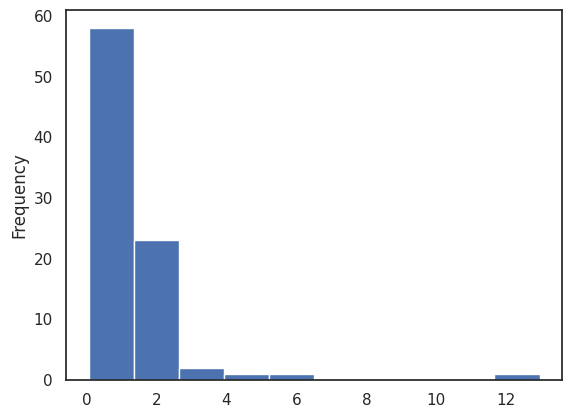

In [30]:
# plot_points(df.query('(country_code_wc == "USA") and (wc_year == 2019)'))
df['apg_coef'] = (df.AST_nba_adj / (df.APG + 0.1))#.fillna(0)
df.apg_coef.plot.hist();
print(df[['apg_coef']].describe().T)
df.query('apg_coef > 10')

In [31]:
plot_asts(df.query('(country_code_wc != "USA") and (apg_coef >= 1)'))

alt.LayerChart(...)

In [32]:
plot_asts(df.query('(country_code_wc != "USA") and (AST_nba_adj >= 3)'))

alt.LayerChart(...)

In [33]:
plot_asts(df.query('(country_code_wc != "USA") and (0.5 < apg_coef < 1)'))

alt.LayerChart(...)

In [34]:
plot_asts(df.query('(country_code_wc != "USA") and (0.5 >= apg_coef)'))

alt.LayerChart(...)

## как менялся EFG%?

In [35]:
df['efg_nba'] = (df.FGM_nba + 0.5 * df.FG3M) / df.FGA_nba
df['efg_wc'] = ((df.FGM_wc * df.GP_wc) + 0.5 * (df['3PM'] * df.GP_wc)) / (df.FGA_wc * df.GP_wc)
df['efg_diff'] = df.efg_wc - df.efg_nba
df['fgapg_nba'] = (df.FGA_nba * (40/48) / df.GP_nba)
df['fgapg_wc'] = (df.FGA_wc)
df['fgapg_diff'] = df.fgapg_wc - df.fgapg_nba
df.head()

,Name,GP_wc,MPG,PPG,PTS_wc,FG%,3P%,FT%,FGM_wc,FGA_wc,3PM,3PA,FTM_wc,FTA_wc,OFF,ORPG,DEF,DRPG,REB_wc,RPG,RP40M,AST_wc,APG,TO,TOPG,AP40M,AST/TO,wc_year,player_name,country_code_wc,DISPLAY_FIRST_LAST,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP_nba,GS,MIN,FGM_nba,FGA_nba,FG_PCT,FG3M,FG3A,FG3_PCT,FTM_nba,FTA_nba,FT_PCT,OREB,DREB,REB_nba,AST_nba,STL,BLK,TOV,PF,PTS_nba,PERSON_ID,FIRST_NAME,LAST_NAME,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,LAST_AFFILIATION,HEIGHT,WEIGHT,SEASON_EXP,JERSEY,POSITION,ROSTERSTATUS,GAMES_PLAYED_CURRENT_SEASON_FLAG,TEAM_ID_draft,TEAM_NAME,TEAM_ABBREVIATION_draft,TEAM_CODE,TEAM_CITY,PLAYERCODE,FROM_YEAR,TO_YEAR,DLEAGUE_FLAG,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,GREATEST_75_FLAG,country_code_nba,PPG_nba,RPG_nba,MPG_nba,PPG_per36_nba,RPG_per36_nba,PTS_nba_adj,REB_nba_adj,AST_nba_adj,MIN_adj,ppg_coef,rpg_coef,apg_coef,efg_nba,efg_wc,efg_diff,fgapg_nba,fgapg_wc,fgapg_diff
0,Andray Blatche (PHI)‎,5,33.8,21.2,106,44.2,27.3,80.0,7.6,17.2,1.2,4.4,4.8,6.0,7.0,1.4,62.0,12.4,69.0,13.8,16.3,4.0,0.8,25.0,5.0,0.9,0.2,2014,Andray Blatche,PHI,Andray Blatche,101154,2013-14,0,1610612751,BKN,27.0,73,7.0,1618.0,321,674,0.476,15.0,54.0,0.278,164,221,0.742,120.0,270.0,390.0,112,75.0,38.0,110.0,166,821,101154,Andray,Blatche,"Blatche, Andray",A. Blatche,andray-blatche,1986-08-22T00:00:00,South Kent HS (CT),USA,South Kent HS (CT)/USA,6-11,260.0,8,0.0,Center-Forward,Inactive,N,1610612764,Wizards,WAS,wizards,Washington,andray_blatche,2005,2013,Y,Y,Y,2005,2,49,NaN,PHI,11.246575,5.342466,22.164384,18.266996,8.677379,9.372146,4.452055,1.278539,18.470320,0.442082,0.320292,1.420599,0.487389,0.476744,-0.010645,7.694064,17.2,9.505936
1,Pau Gasol (ESP)‎,7,26.5,20.0,140,63.5,27.3,78.4,7.7,12.1,0.4,1.6,4.1,5.3,14.0,2.0,27.0,3.9,41.0,5.9,8.9,10.0,1.4,19.0,2.7,2.2,0.5,2014,Pau Gasol,ESP,Pau Gasol,2200,2013-14,0,1610612747,LAL,33.0,60,60.0,1884.0,425,885,0.480,4.0,14.0,0.286,187,254,0.736,124.0,456.0,580.0,201,27.0,92.0,141.0,124,1041,2200,Pau,Gasol,"Gasol, Pau",P. Gasol,pau-gasol,1980-07-06T00:00:00,,Spain,FC Barcelona/Germany,7-0,250.0,18,17.0,Center-Forward,Inactive,N,1610612749,Bucks,MIL,bucks,Milwaukee,pau_gasol,2001,2018,N,Y,Y,2001,1,3,NaN,ESP,17.350000,9.666667,31.400000,19.891720,11.082803,14.458333,8.055556,2.791667,26.166667,0.722917,1.342593,1.861111,0.482486,0.652893,0.170407,12.291667,12.1,-0.191667
2,Luís Scola (ARG)‎,6,32.4,19.5,117,48.2,60.0,66.7,6.8,14.2,0.5,0.8,5.3,8.0,13.0,2.2,38.0,6.3,51.0,8.5,10.5,14.0,2.3,11.0,1.8,2.9,1.3,2014,Luís Scola,ARG,Luis Scola,2449,2013-14,0,1610612754,IND,34.0,82,2.0,1399.0,263,560,0.470,1.0,7.0,0.143,99,136,0.728,86.0,305.0,391.0,81,26.0,16.0,108.0,164,626,2449,Luis,Scola,"Scola, Luis",L. Scola,luis-scola,1980-04-30T00:00:00,Tau Ceramica,Argentina,Tau Ceramica/Argentina,6-9,241.0,9,NaN,Forward,Inactive,N,0,NaN,NaN,NaN,NaN,luis_scola,2007,2016,N,Y,Y,2002,2,55,NaN,ARG,7.634146,4.768293,17.060976,16.108649,10.061472,6.361789,3.973577,0.823171,14.217480,0.326246,0.462044,0.342988,0.470536,0.496479,0.025943,5.691057,14.2,8.508943
3,Gustavo Ayon (MEX)‎,5,32.2,17.6,88,61.0,0.0,51.6,7.2,11.8,0.0,0.0,3.2,6.2,18.0,3.6,20.0,4.0,38.0,7.6,9.5,7.0,1.4,12.0,2.4,1.8,0.6,2014,Gustavo Ayon,MEX,Gustavo Ayon,202970,2013-14,0,1610612737,ATL,29.0,26,14.0,429.0,52,102,0.510,0.0,0.0,0.000,8,20,0.400,42.0,83.0,125.0,28,25.0,10.0,29.0,47,112,202970,Gustavo,Ayon,"Ayon, Gustavo",G. Ayon,gustavo-ayon,1985-04-01T00:00:00,Baloncesto Fuenlabrada,Mexico,Baloncesto Fuenlabrada/Mexico,NaN,NaN,2,NaN,NaN,Inactive,N,0,NaN,NaN,NaN,NaN,gustavo_ayon,2011,2016,N,Y,Y,Undrafted,Undrafted,Undrafted,NaN,MEX,4.307692,4.807692,16.500000,9.398601,10.489510,3.589744,4.006410,0.897436,13.750000,0.203963,0.520313,0.598291,0.509804,0.610169,0.100366,3.269231,11.8,8.530769
4,Francisco Alberto Garcia (DOM)‎,5,28.2,17.6,88,61.1,64.3,100.0,6.6,10.8,3.6,5.6,0.8,0.8,1.0,0.2,15.0,3.0,16.0,3.2,4.6,11.0,2.2,14.0,2.8,3.1,0.8,2014,Francisco Alberto Garcia,DOM,Francisco Garci

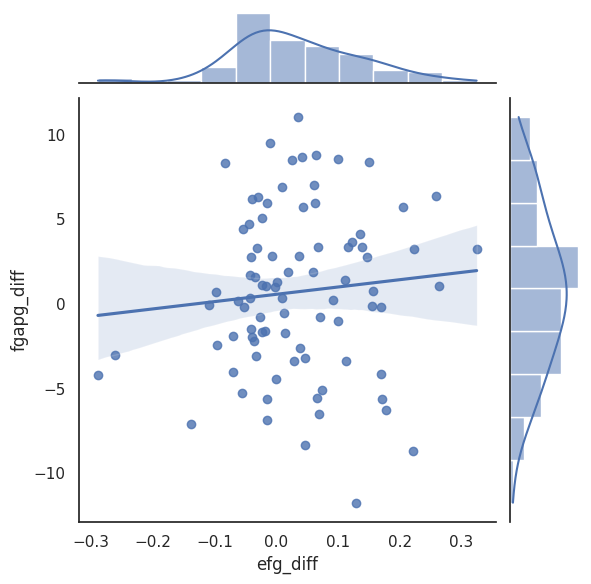

In [36]:
sns.jointplot(data=df, x="efg_diff", y="fgapg_diff", kind="reg")

In [44]:
def plot_efg_fgapg(df, font_size=12, label_rotation=0):
    scatter_plot = alt.Chart(df).mark_circle().encode(
        x='efg_diff:Q',
        y='fgapg_diff:Q',
        color=alt.Color('wc_year:N', legend=alt.Legend(title='Year')),
        tooltip=['DISPLAY_FI_LAST:N', 'efg_diff:Q', 'fgapg_diff:Q', 'fgapg_wc', 'fgapg_nba', 'efg_wc', 'efg_nba', ]
    )

    text_labels = scatter_plot.mark_text(
        align='left',
        baseline='middle',
        dx=7,
        fontSize=font_size,
        angle=label_rotation
    ).encode(
        x=alt.X('efg_diff:Q', title='(EFG% на ЧМ) минус (EFG% в НБА)'),
        y=alt.Y('fgapg_diff:Q', title='(Бросков за игру на ЧМ) минус (Бросков за игру в НБА)*'),
        text='DISPLAY_FI_LAST:N',
    )
    regression_line = scatter_plot.transform_regression(
        'efg_diff', 'fgapg_diff'#, groupby=['wc_year']
    ).mark_line(color='gray', strokeDash=[5, 2]).transform_fold(
     ["Общий тренд"], 
     as_=["Regression", "y"]
    ).encode(alt.Color("Regression:N"))

    x_axis_line = alt.Chart(pd.DataFrame({'x': [0]})).mark_rule(color='black', strokeDash=[5, 5]).encode(
        x='x:Q'
    )

    y_axis_line = alt.Chart(pd.DataFrame({'y': [0]})).mark_rule(color='black', strokeDash=[5, 5]).encode(
        y='y:Q'
    )
    
    final_plot = scatter_plot + text_labels + regression_line + x_axis_line + y_axis_line

    return final_plot.properties(
        title=alt.Title('Бросковая эффективность и нагрузка в НБА и на ЧМ', fontSize=font_size*5//4),
        width=1200,
        height=1000
    ).configure_axis(
    labelFontSize=font_size,
    titleFontSize=font_size
    ).configure_legend(
    titleFontSize=font_size,
    labelFontSize=font_size
    )

plot_efg_fgapg(
    df.query('(country_code_wc == "USA")'),
    font_size=14,
    label_rotation=330
)

alt.LayerChart(...)

In [45]:
plot_efg_fgapg(
    df.query('(country_code_wc != "USA")'),
    font_size=14,
    label_rotation=30
)

alt.LayerChart(...)